In [1]:
import sys
import tensorflow as tf
import numpy as np
import yaml
import os
from fedn.utils.kerashelper import KerasHelper
from models.unet import unet
from data.datagenerator import DataGenerator
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)





with open('settings.yaml', 'r') as fh:
    try:
        settings = dict(yaml.safe_load(fh))
    except yaml.YAMLError as e:
        raise(e)

dim = tuple(np.int32(settings['image_dimensions'].split(',')))


# Create datageneraor
path = '../data/datapartitions/0/train_set'
d, counts = np.unique(np.array(["_".join(x.split("_")[:-1]) for x in os.listdir(path)]), return_counts=True)
data_ids = [os.path.join(path,s) for s in d if s.startswith("Subject")]
data_generator = DataGenerator(data_ids,
                               batch_size=int(settings['batch_size']),
                               dim=dim,
                               shuffle=True,
                               original_size=(256,256),
                               binary_class=bool(settings['binary_class']))

In [2]:
first = True

for x,y in data_generator:
    
    if first:
        print(x.shape, y.shape)
    
    first = False

(32, 256, 256, 4) (32, 256, 256, 4)


(array([6291456.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2097152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

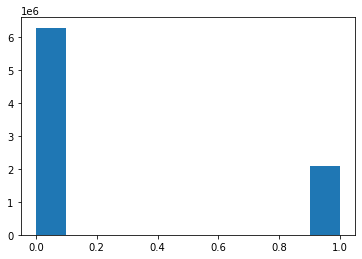

In [3]:
from matplotlib import pylab as plt

plt.hist(y.flatten())

In [ ]:
np.unique(y.flatten())

In [ ]:
np.unique(x.flatten())[-1]

In [ ]:
np.mean(x,(0,1,2))

In [2]:
import numpy as np
class_weights = np.load('class_weights.npy')

In [5]:
model = unet(img_size=(*dim, 4), Nclasses=4, class_weights=class_weights, Nfilter_start=32)


2022-02-22 17:50:58.373402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 17:50:58.377308: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 17:50:58.377716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 17:50:58.378306: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
#history = model.model.fit(data_generator, epochs=int(settings['epochs']))
history = model.model.fit(data_generator, epochs=2)

Epoch 1/2


2022-02-22 17:51:01.182564: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-02-22 17:51:02.932483: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.70GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-22 17:51:02.932528: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.70GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-22 17:51:03.026997: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.70GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory

43/43 [==============================] - 16s 271ms/step - loss: nan - accuracy: 0.9684 - dice: nan - diceneg: nan - dice1: nan - dice2: nan - dice3: nan - den: 2097152.0000
Epoch 2/2
43/43 [==============================] - 12s 274ms/step - loss: nan - accuracy: 0.9903 - dice: nan - diceneg: nan - dice1: nan - dice2: nan - dice3: nan - den: 2097152.0000


In [3]:
class_weights

array([5.77348183e-04, 5.80206959e-01, 8.18216218e-02, 3.37394071e-01])

In [8]:
training_counts = data_generator.count_pixels()

0 / 1380
1000 / 1380


In [9]:
training_counts

array([8.9565303e+07, 8.9124000e+04, 6.3198900e+05, 1.5326400e+05])

In [10]:
class_weights = 1 / np.sum(1 / training_counts) / training_counts

In [11]:
class_weights

array([5.77348183e-04, 5.80206959e-01, 8.18216218e-02, 3.37394071e-01])